# MA506 Probability and Statistical Inference
# Lec 25: Multiclass probabilistic classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Multinomial logistic Regression

Recalling, for a 2 class problem, assuming class labels are 0 and 1, the probability of class 1 was quantified by the sigmoid function:

$$
P(y = 1|x) = h(x) = \frac{1}{1+e^{-X\beta}}
$$

Now in a multiclass problem, instead of class label $\{0,1\}$ assuming we have $K$ class labels. Hence y can take $K$ possible values:
$$
y = \{1,2,...,K\}
$$

For this case multinomial logistic regression assigns each class its own $\beta_i$ vector. Hence:

$$
P(y = i|x) = \frac{e^{X\beta_i}}{\sum_{j=1}^K e^{X \beta_j}}
$$




**For example, for a 3 class problem, the procedure can be summarized as follows**:

1. Fit 3 logistic regression models
    - For class 1 vs all other classes (obtain weight $\beta_1$)
    - For class 2 vs all other classes (obtain weight $\beta_2$)
    - For class 3 vs all other classes (obtain weight $\beta_3$)
2. During prediction of class for a new sample x, compute:

$$
P(y = 1) = \frac{e^{X \beta_1}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

$$
P(y = 2) = \frac{e^{X \beta_2}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

$$
P(y = 3) = \frac{e^{X \beta_3}}{e^{X \beta_1} + e^{X \beta_2} + e^{X \beta_3}}
$$

3. Final class prediction is the class with highest probability:

$$
i = \arg\max_i P(y = i)
$$


## Datasets we will use

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
def plot_digits(X,y):
    index = np.random.randint(X.shape[0])
    sample = X[index,:]
    label = y[index]
    plt.imshow(sample.reshape(8,8),cmap = 'gray')
    plt.title(f'Digit: {label}',size =15)
    plt.show()

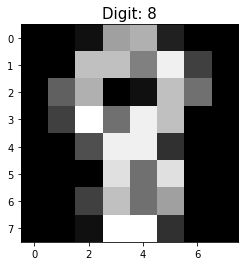

In [5]:
plot_digits(X,y)

## Dividing data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Logistic Regression

In [8]:
def h(X,beta):
    ## returns the value of the sigmoid function
    ypred = 1/(1 + np.exp(-1*X.dot(beta)))
    return ypred

def model_cost(X,y,beta):
    ## computes the value of the model fitting cost
    cost = 0
    for j in range(X.shape[0]):
        term1 = y[j]*np.log(h(X[j,:],beta))[0]
        term2 = (1 - y[j])*np.log(1 - h(X[j,:],beta))[0]
        cost = cost + (term1+term2)
    return -1*cost

def gradient_descent(X,y,beta0,alpha,iteration):
    ## Implemented iteration for the gradient descent algorithm
    ypred = h(X,beta0)
    beta = [beta0]
    cost = [model_cost(X,y,beta0)]
    for j in range(iteration):
        grad_l = -1*X.T.dot(y.reshape(-1,1) - ypred)
        beta_new = beta[-1] - alpha * grad_l
        ypred = h(X,beta_new)
        beta.append(beta_new)
        #print(f'beta: {beta_new[0][0],beta_new[1][0]}')
        print('Cost at iteration '+str(j)+' is: ',model_cost(X,y,beta_new))
        cost.append(model_cost(X,y,beta_new))
    return [beta_new,cost]

In [9]:
classes = list(set(y))
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
## Number of classes
n_classes = len(classes)
n_classes

10

In [11]:
X_train[0,:]

array([ 0.,  0.,  0.,  8., 10., 14.,  3.,  0.,  0.,  1., 13., 13.,  9.,
       12.,  8.,  0.,  0.,  6., 16.,  8.,  8., 16.,  4.,  0.,  0.,  5.,
       16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  5.,  8., 14., 12.,  0.,
        0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
        8.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  2.,  0.,  0.,  0.])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[0,:]

array([ 0.        , -0.34338378, -1.09642621, -0.88717562, -0.42825571,
        1.43845406,  0.49363934, -0.12501886, -0.05963551, -0.3151569 ,
        0.47849512,  0.21918793, -0.28691819,  0.6197714 ,  1.76922825,
       -0.12614188, -0.03992024,  0.96822696,  1.0921471 ,  0.14757351,
        0.14198996,  1.32778473,  0.70793513, -0.11294863, -0.02821663,
        0.80906081,  1.10876452,  1.21974443,  0.98975536,  0.26282114,
       -0.64074225, -0.03992024,  0.        , -0.67349682, -0.41365522,
       -0.16812017,  0.62783539,  0.5664439 , -0.82668859,  0.        ,
       -0.06209797, -0.53059473, -1.06319169, -0.66713857,  1.31816087,
       -0.55060546, -0.7726095 , -0.09516311, -0.04237744, -0.40873595,
       -1.33984381,  1.01453563, -0.30892748, -1.43653873, -0.7348467 ,
       -0.19859912, -0.02821663, -0.30739208, -0.90153224, -0.01866477,
       -1.98373642, -1.12193961, -0.48894777, -0.18556033])

In [13]:
beta0 = 0.00001*np.ones([X.shape[1]+1,1])
alpha = 0.01
iteration = 100
beta_vec = []
Xs = np.concatenate((np.ones([len(X_train),1]),X_train),axis = 1)
for i in classes:
    y_new = y_train.copy()
    y_new[y_train == i] = 1
    y_new[y_train!= i] = 0
    beta_new,cost = gradient_descent(Xs,y_new,beta0,alpha,iteration)
    beta_vec.append(beta_new)

/var/folders/d7/n2s59nxn5f38lzcmx7727n300000gn/T/ipykernel_91179/3530693907.py:11: RuntimeWarning: divide by zero encountered in log
  term2 = (1 - y[j])*np.log(1 - h(X[j,:],beta))[0]
/var/folders/d7/n2s59nxn5f38lzcmx7727n300000gn/T/ipykernel_91179/3530693907.py:11: RuntimeWarning: invalid value encountered in multiply
  term2 = (1 - y[j])*np.log(1 - h(X[j,:],beta))[0]


Cost at iteration 0 is:  nan
Cost at iteration 1 is:  549.0099941540459
Cost at iteration 2 is:  288.0617736451865
Cost at iteration 3 is:  82.06124404147252
Cost at iteration 4 is:  21.629639743589912
Cost at iteration 5 is:  15.22731254112984
Cost at iteration 6 is:  12.288884859943476
Cost at iteration 7 is:  10.558215412713686
Cost at iteration 8 is:  9.378177526046562
Cost at iteration 9 is:  8.49551859151884
Cost at iteration 10 is:  7.797559779439314
Cost at iteration 11 is:  7.227066700260707
Cost at iteration 12 is:  6.750835895196942
Cost at iteration 13 is:  6.347297156958587
Cost at iteration 14 is:  6.001309603976792
Cost at iteration 15 is:  5.701750854901429
Cost at iteration 16 is:  5.4402277044550456
Cost at iteration 17 is:  5.210283151533475
Cost at iteration 18 is:  5.006863897375913
Cost at iteration 19 is:  4.825948873730379
Cost at iteration 20 is:  4.664286760432659
Cost at iteration 21 is:  4.519209487538481
Cost at iteration 22 is:  4.38849888736789
Cost at it

Cost at iteration 89 is:  23.58762577963173
Cost at iteration 90 is:  23.509089596268417
Cost at iteration 91 is:  23.431448036031814
Cost at iteration 92 is:  23.35467491331583
Cost at iteration 93 is:  23.278746121459008
Cost at iteration 94 is:  23.203639609688935
Cost at iteration 95 is:  23.12933501473998
Cost at iteration 96 is:  23.05581326152185
Cost at iteration 97 is:  22.983056536474653
Cost at iteration 98 is:  22.91104790403712
Cost at iteration 99 is:  22.839771360727497
Cost at iteration 0 is:  nan
Cost at iteration 1 is:  1158.7574931739928
Cost at iteration 2 is:  nan
Cost at iteration 3 is:  147.52947893635385
Cost at iteration 4 is:  34.69929522883221
Cost at iteration 5 is:  21.37292623020594
Cost at iteration 6 is:  14.420667971075131
Cost at iteration 7 is:  10.598853901239192
Cost at iteration 8 is:  8.451578171536394
Cost at iteration 9 is:  7.067326310639793
Cost at iteration 10 is:  6.069980942718265
Cost at iteration 11 is:  5.314104455096794
Cost at iteratio

Cost at iteration 77 is:  18.074199133228852
Cost at iteration 78 is:  17.993629033132205
Cost at iteration 79 is:  17.914478383084163
Cost at iteration 80 is:  17.836702366731384
Cost at iteration 81 is:  17.760258346133515
Cost at iteration 82 is:  17.68510570934491
Cost at iteration 83 is:  17.61120573199219
Cost at iteration 84 is:  17.538521451326865
Cost at iteration 85 is:  17.467017551412837
Cost at iteration 86 is:  17.39666025827057
Cost at iteration 87 is:  17.327417243936452
Cost at iteration 88 is:  17.25925753851909
Cost at iteration 89 is:  17.192151449440164
Cost at iteration 90 is:  17.126070487139987
Cost at iteration 91 is:  17.060987296610886
Cost at iteration 92 is:  16.996875594191568
Cost at iteration 93 is:  16.93371010911955
Cost at iteration 94 is:  16.871466529393558
Cost at iteration 95 is:  16.810121451546433
Cost at iteration 96 is:  16.74965233397195
Cost at iteration 97 is:  16.69003745348718
Cost at iteration 98 is:  16.63125586484416
Cost at iteration 

Cost at iteration 96 is:  3.618942986471379
Cost at iteration 97 is:  3.6019436846971766
Cost at iteration 98 is:  3.585187515138879
Cost at iteration 99 is:  3.568668475429565
Cost at iteration 0 is:  nan
Cost at iteration 1 is:  1021.0190381601309
Cost at iteration 2 is:  1781.0474330359111
Cost at iteration 3 is:  795.0330859534776
Cost at iteration 4 is:  43.633261494565055
Cost at iteration 5 is:  28.364795506678483
Cost at iteration 6 is:  22.421154403185163
Cost at iteration 7 is:  19.290764251681292
Cost at iteration 8 is:  17.24473675170854
Cost at iteration 9 is:  15.732128136467596
Cost at iteration 10 is:  14.532858812318754
Cost at iteration 11 is:  13.541783381580032
Cost at iteration 12 is:  12.70113382934092
Cost at iteration 13 is:  11.975518617769206
Cost at iteration 14 is:  11.341440247808041
Cost at iteration 15 is:  10.782385451730402
Cost at iteration 16 is:  10.28625317574147
Cost at iteration 17 is:  9.843857824052881
Cost at iteration 18 is:  9.447986975463865

Cost at iteration 85 is:  6.601118168151703
Cost at iteration 86 is:  6.5643079470969115
Cost at iteration 87 is:  6.527976484425209
Cost at iteration 88 is:  6.492113243258776
Cost at iteration 89 is:  6.456708049920612
Cost at iteration 90 is:  6.421751074966566
Cost at iteration 91 is:  6.387232815617399
Cost at iteration 92 is:  6.353144079458034
Cost at iteration 93 is:  6.319475969285792
Cost at iteration 94 is:  6.286219869003084
Cost at iteration 95 is:  6.253367430460703
Cost at iteration 96 is:  6.220910561169017
Cost at iteration 97 is:  6.188841412801799
Cost at iteration 98 is:  6.157152370426778
Cost at iteration 99 is:  6.125836042402001
Cost at iteration 0 is:  236.19683399453305
Cost at iteration 1 is:  408.77687989521945
Cost at iteration 2 is:  332.0498104078778
Cost at iteration 3 is:  474.8124800233885
Cost at iteration 4 is:  252.77498762773416
Cost at iteration 5 is:  240.24123547624913
Cost at iteration 6 is:  110.74434275754493
Cost at iteration 7 is:  103.3176

Cost at iteration 72 is:  26.576391424626156
Cost at iteration 73 is:  26.500310097784155
Cost at iteration 74 is:  26.42578552088605
Cost at iteration 75 is:  26.352755078216997
Cost at iteration 76 is:  26.281159665426546
Cost at iteration 77 is:  26.21094345143257
Cost at iteration 78 is:  26.14205365898918
Cost at iteration 79 is:  26.074440362236352
Cost at iteration 80 is:  26.00805629972349
Cost at iteration 81 is:  25.94285670154492
Cost at iteration 82 is:  25.878799129365134
Cost at iteration 83 is:  25.815843328229494
Cost at iteration 84 is:  25.753951089162875
Cost at iteration 85 is:  25.69308612165524
Cost at iteration 86 is:  25.633213935217597
Cost at iteration 87 is:  25.57430172926878
Cost at iteration 88 is:  25.516318290680704
Cost at iteration 89 is:  25.459233898372457
Cost at iteration 90 is:  25.40302023439663
Cost at iteration 91 is:  25.347650301013953
Cost at iteration 92 is:  25.293098343292964
Cost at iteration 93 is:  25.239339776815065
Cost at iteration 

In [14]:
beta_vec[4]

array([[-9.93304597e+00],
       [ 1.00000000e-05],
       [-5.38921268e-01],
       [-1.60323415e-01],
       [-1.81609413e+00],
       [-8.90686307e-01],
       [-1.47830750e+00],
       [-7.98005142e-01],
       [-1.32727588e-01],
       [ 1.59802758e-01],
       [ 4.43687047e-01],
       [-6.67507736e-01],
       [-9.55875932e-01],
       [-1.27129960e+00],
       [-1.03782760e+00],
       [-5.75373193e-01],
       [ 1.38021867e-01],
       [ 1.03603834e-01],
       [ 1.13704450e-01],
       [ 8.18319305e-01],
       [ 2.32574703e-01],
       [-2.61597733e-01],
       [ 6.68781947e-01],
       [-2.40264735e-01],
       [ 3.89255084e-01],
       [ 4.57608029e-01],
       [-2.73849265e-01],
       [ 8.84637448e-01],
       [-2.27743491e-01],
       [-3.18854238e-02],
       [ 3.61563421e-01],
       [ 1.09251728e+00],
       [ 6.47350912e-01],
       [ 1.00000000e-05],
       [ 7.98969647e-01],
       [-2.61998626e-01],
       [-1.61799333e-01],
       [ 6.79581219e-01],
       [ 3.7

In [15]:
def pred(X,beta_vec):
    prob1 = []
    for i in X:
        temp = []
        for j in range(10):
            beta = beta_vec[j]
            prob = np.exp(i.dot(beta))
            temp.append(prob)
        prob1.append([ii/sum(temp) for ii in temp])
    probability = np.array(prob1)
    return probability.reshape(len(X),len(beta_vec))

In [16]:
X_test[:,10]

array([16., 14., 15.,  9., 10.,  4.,  0., 11., 14., 16., 14., 16.,  5.,
        5.,  1.,  6.,  0., 14., 16., 15., 16.,  9., 13., 14., 16., 16.,
        6., 13., 15., 14.,  8., 14.,  6.,  9., 13.,  0., 15.,  5., 13.,
        0., 12., 12., 13., 14.,  8., 10.,  4., 12., 13.,  0., 13.,  0.,
        7., 16., 12., 15., 15., 13.,  9., 10., 10., 14., 14.,  5.,  2.,
       12.,  9.,  4., 15.,  6., 15., 15., 14.,  0., 15.,  7., 14., 11.,
       15., 15., 12., 15.,  1., 16., 13., 16.,  0., 16.,  7., 15., 14.,
        7., 12.,  0.,  8.,  6.,  0.,  9., 16.,  5., 16., 16., 15., 10.,
       13., 10.,  7.,  0.,  1.,  4.,  4., 14., 14., 13.,  9., 15., 16.,
        8.,  0., 14., 13., 15., 16.,  1.,  6.,  8., 13.,  6.,  2., 15.,
       16.,  4., 14., 16., 12., 16., 16., 15., 16.,  7., 16., 14.,  3.,
        9., 10.,  0., 16., 13., 12., 12., 14.,  0., 16., 12.,  4.,  2.,
       16.,  0.,  2., 14.,  1., 10., 11., 16., 11., 11., 15., 12., 14.,
       13.,  3.,  0., 13., 12.,  7., 12., 12., 11., 13.,  6.,  2

In [17]:
X_test = scaler.transform(X_test)
X_test[:,10]

array([ 1.02677988,  0.66125671,  0.84401829, -0.25255121, -0.06978963,
       -1.16635913, -1.89740546,  0.11297196,  0.66125671,  1.02677988,
        0.66125671,  1.02677988, -0.98359754, -0.98359754, -1.71464388,
       -0.80083596, -1.89740546,  0.66125671,  1.02677988,  0.84401829,
        1.02677988, -0.25255121,  0.47849512,  0.66125671,  1.02677988,
        1.02677988, -0.80083596,  0.47849512,  0.84401829,  0.66125671,
       -0.43531279,  0.66125671, -0.80083596, -0.25255121,  0.47849512,
       -1.89740546,  0.84401829, -0.98359754,  0.47849512, -1.89740546,
        0.29573354,  0.29573354,  0.47849512,  0.66125671, -0.43531279,
       -0.06978963, -1.16635913,  0.29573354,  0.47849512, -1.89740546,
        0.47849512, -1.89740546, -0.61807438,  1.02677988,  0.29573354,
        0.84401829,  0.84401829,  0.47849512, -0.25255121, -0.06978963,
       -0.06978963,  0.66125671,  0.66125671, -0.98359754, -1.53188229,
        0.29573354, -0.25255121, -1.16635913,  0.84401829, -0.80

In [18]:
Xtest = np.concatenate((np.ones([len(X_test),1]),X_test),axis = 1)
prob = pred(Xtest,beta_vec)

In [19]:
prob.shape

(540, 10)

In [20]:
prob[0,:]

array([1.34388604e-10, 3.92410348e-12, 9.99999987e-01, 5.99393885e-13,
       2.30976318e-12, 6.15516496e-14, 1.34137578e-20, 1.31930729e-08,
       4.43311739e-11, 1.51339498e-12])

In [21]:
ind = np.argmax(prob,axis = 1)

In [22]:
ind[0]

2

In [23]:
ind

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,ind)

0.9629629629629629